In [24]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline
import  matplotlib.pyplot as plt
import joblib
from sklearn.metrics import mean_absolute_percentage_error
import random
import torch
import os

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
seed_everything(seed=521)

In [25]:
train1=pd.read_csv("C:/Users/Van/11H2S/Different Model-new/train_com.csv")
train1.describe()

,L,V,DO,E,pH,TOC,TN,C/N,C/S,SO4,H2S
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,5.397959,0.227172,0.979195,961.551020,7.345535,36.519993,16.075040,2.301271,0.607562,61.503898,17.966688
std,2.303798,0.090988,0.640229,75.694341,0.094923,21.429253,5.540479,1.007613,0.383239,13.442816,17.429645
min,1.000000,0.102000,0.020000,745.000000,7.100000,8.568129,6.243985,0.941765,0.225891,35.936300,0.010000
25%,3.750000,0.158986,0.359371,920.750000,7.280826,21.641416,11.899717,1.473589,0.355115,50.422000,2.862500
50%,6.000000,0.209000,1.031873,972.000000,7.320000,32.172224,15.787898,2.077881,0.502995,61.367400,9.710000
75%,7.000000,0.275000,1.465000,1018.250000,7.380000,46.386019,19.151969,2.998457,0.768295,69.168200,34.592805
max,9.000000,0.558000,2.540000,1100.000000,7.700000,155.442607,40.117917,5.704046,3.945414,98.179500,51.572163


In [26]:
test1=pd.read_csv("../test1.csv")
test1.describe()

,L,V,DO,E,pH,TOC,TN,C/N,C/S,SO4,H2S
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,5.791667,0.195000,1.114167,954.000000,7.356667,33.082966,16.421136,2.065140,0.538394,63.681004,30.175000
std,2.264646,0.074305,0.661999,83.173993,0.107851,17.205562,6.707066,0.855174,0.304127,13.195245,17.598888
min,1.000000,0.102000,0.120000,807.000000,7.200000,9.727586,5.973685,0.931152,0.166123,36.481900,0.010000
25%,6.000000,0.139250,0.390000,895.000000,7.270000,21.539393,12.769102,1.383196,0.326058,59.029075,15.787500
50%,7.000000,0.166000,1.250000,960.000000,7.320000,28.351351,15.669401,2.012730,0.472753,64.461800,33.250000
75%,7.000000,0.235750,1.650000,1006.750000,7.440000,45.563246,18.390176,2.669494,0.721353,69.482000,46.580000
max,9.000000,0.351000,2.250000,1074.000000,7.610000,84.636852,40.117917,4.231449,1.420067,98.179500,50.000000


In [27]:
train=np.array(train1)
test=np.array(test1)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split


train_x_1=train[:,:10]
train_y_1=train[:,10]
test_x_1=test[:,:10]
test_y_1=test[:,10]

scaler1=MinMaxScaler()
scaler2=MinMaxScaler()
scaler3=MinMaxScaler()
scaler4=MinMaxScaler()

train_x=scaler1.fit_transform(train_x_1)
train_y=scaler2.fit_transform(np.reshape(train_y_1,(-1,1)))
test_x=scaler3.fit_transform(test_x_1)
test_y=scaler4.fit_transform(np.reshape(test_y_1,(-1,1)))

In [28]:
from lightgbm import LGBMRegressor

model = LGBMRegressor(
    num_leaves=32,
    max_depth=3,
    n_estimators=200,
    # objective='regression', # 默认是二分类
    # min_split_gain=0.0,
    # min_child_samples=20,
    # subsample=0.8,
    # subsample_freq=0,
    # colsample_bytree=1.0,
    # reg_alpha=2.7586206896551726,
    # reg_lambda=9.655172413793103,
    # random_state=2022,
    # silent=True
)
model.fit(train_x,train_y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 511
[LightGBM] [Info] Number of data points in the train set: 196, number of used features: 10
[LightGBM] [Info] Start training from score 0.348253
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

LGBMRegressor(max_depth=3, n_estimators=200, num_leaves=32)

In [29]:
pre=model.predict(test_x)
print(pre)

pre=scaler4.inverse_transform(np.reshape(pre,(-1,1)))

[ 0.11517545  0.03926498 -0.01199328  0.08143099  0.28594758  0.24445362
  0.06792297  0.85595808  0.63706627  0.7703578   0.81036632  0.78544943
  0.3829074   0.61306189  0.45530959  0.54695249  0.54454038  0.71523406
  0.80765918  0.48432372  0.78788484  1.00706993  0.85595808  0.7703578 ]


In [30]:
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
MAE=mean_absolute_error(test_y_1, pre)
MSE=mean_squared_error(test_y_1, pre)
RMSE=sqrt(mean_squared_error(test_y_1,pre))
R2=r2_score(test_y_1,pre)
print("mean_absolute_error:", mean_absolute_error(test_y_1, pre))
print("mean_squared_error:", mean_squared_error(test_y_1, pre))
print("rmse:", sqrt(mean_squared_error(test_y_1, pre)))
print("r2 score:", r2_score(test_y_1, pre))

mean_absolute_error: 5.998545076314798
mean_squared_error: 60.76523681769917
rmse: 7.795206015090247
r2 score: 0.7952762959600679


In [31]:
test1=pd.read_csv("C:/Users/Van/Desktop/test-126.csv")
test1.describe()
test1=np.array(test1)
test1_x=test1[:,:10]
test1_y=test1[:,10]

scaler5=MinMaxScaler()
scaler6=MinMaxScaler()

train_x1=scaler5.fit_transform(test1_x)
train_y1=scaler6.fit_transform(np.reshape(test1_y,(-1,1)))

In [32]:
pre1=model.predict(test1_x)
print(pre1)

pre1=scaler6.inverse_transform(np.reshape(pre1,(-1,1)))

print("mean_absolute_error:", mean_absolute_error(test1_y, pre1))
print("mean_squared_error:", mean_squared_error(test1_y, pre1))
print("rmse:", sqrt(mean_squared_error(test1_y, pre1)))
print("r2 score:", r2_score(test1_y, pre1))

[0.11661285 0.28866437 0.11661285 0.20978958 0.11661285 0.28866437
 0.25375584 0.24215827 0.25746276 0.11661285 0.25375584 0.11661285
 0.11661285 0.09782164 0.28181029 0.27772265 0.11257401 0.13494968
 0.11661285 0.20978958 0.12189961 0.12351572 0.12351572 0.11661285
 0.20978958 0.20978958 0.12189961 0.27772265 0.23304417 0.22251724
 0.22251724 0.13742256 0.23304417 0.14432543 0.2652224  0.22251724]
mean_absolute_error: 9.505249435335772
mean_squared_error: 158.81800649735717
rmse: 12.602301634914044
r2 score: 0.0759106782042902


In [33]:
results = {
    'Metric': ['mean_absolute_error', 'mean_squared_error', 'rmse', 'r2 score'],
    'Value': [MAE, MSE, RMSE, R2]
}
# 使用Pandas创建一个数据框
results_df = pd.DataFrame(results)

# 打印数据框
print(results_df)
results_df.to_csv('7.csv', index=False)

                Metric      Value
0  mean_absolute_error   5.998545
1   mean_squared_error  60.765237
2                 rmse   7.795206
3             r2 score   0.795276


In [34]:
datapre=np.asarray(pre)
datapre.tofile('7-pre.csv',sep=',',format='%10.5f')

In [35]:
import shap
shap.initjs()  # notebook环境下，加载用于可视化的JS代码

In [36]:
columns = ["L", "V", "DO", "E", "pH", "TOC", "TN", "C/N", "C/S", "SO4"]

# 转换成Pandas DataFrame
df = pd.DataFrame(train_x, columns=columns)

In [37]:
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(df) 
shap_values2 = explainer(df)

In [38]:
print(shap_values.shape)
print(shap_values)

(196, 10)
[[ 1.99373389e-01 -9.90818415e-02 -6.22582088e-02 ... -3.00516722e-03
   4.92811349e-02 -1.22368054e-02]
 [ 2.58518186e-01 -9.42648405e-02 -6.54875599e-02 ... -1.13604941e-03
   4.74090099e-02 -1.28240038e-02]
 [ 2.78301186e-01  6.87210869e-02 -5.78093322e-02 ... -8.44057754e-03
  -3.17070384e-02  3.91733690e-02]
 ...
 [-1.51051178e-01 -6.42436795e-02  2.42113845e-02 ... -2.96505435e-02
  -3.20139468e-02  5.19947268e-03]
 [-1.45535413e-01 -4.91007141e-02  1.41564794e-02 ...  1.21178417e-02
   5.45746781e-02 -1.41429933e-05]
 [-1.14145417e-01 -5.80454361e-02 -1.62480808e-02 ...  2.82284622e-03
  -2.27145494e-02  3.73570225e-02]]


In [39]:
print(shap_values2)
print(shap_values2.shape)

.values =
array([[ 1.99373389e-01, -9.90818415e-02, -6.22582088e-02, ...,
        -3.00516722e-03,  4.92811349e-02, -1.22368054e-02],
       [ 2.58518186e-01, -9.42648405e-02, -6.54875599e-02, ...,
        -1.13604941e-03,  4.74090099e-02, -1.28240038e-02],
       [ 2.78301186e-01,  6.87210869e-02, -5.78093322e-02, ...,
        -8.44057754e-03, -3.17070384e-02,  3.91733690e-02],
       ...,
       [-1.51051178e-01, -6.42436795e-02,  2.42113845e-02, ...,
        -2.96505435e-02, -3.20139468e-02,  5.19947268e-03],
       [-1.45535413e-01, -4.91007141e-02,  1.41564794e-02, ...,
         1.21178417e-02,  5.45746781e-02, -1.41429933e-05],
       [-1.14145417e-01, -5.80454361e-02, -1.62480808e-02, ...,
         2.82284622e-03, -2.27145494e-02,  3.73570225e-02]])

.base_values =
array([0.34825319, 0.34825319, 0.34825319, 0.34825319, 0.34825319,
       0.34825319, 0.34825319, 0.34825319, 0.34825319, 0.34825319,
       0.34825319, 0.34825319, 0.34825319, 0.34825319, 0.34825319,
       0.3482531

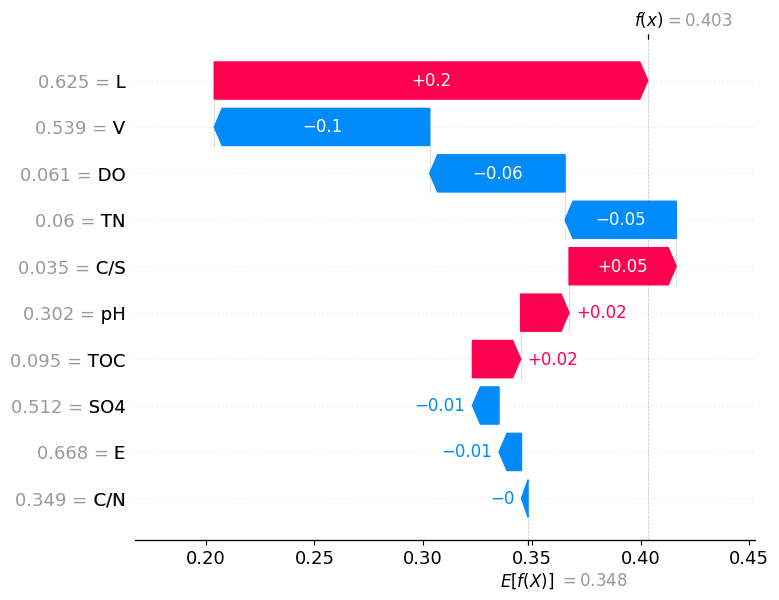

In [40]:
# 第0个样本的解释：以瀑布图形式可视化
shap.plots.waterfall(shap_values2[0])

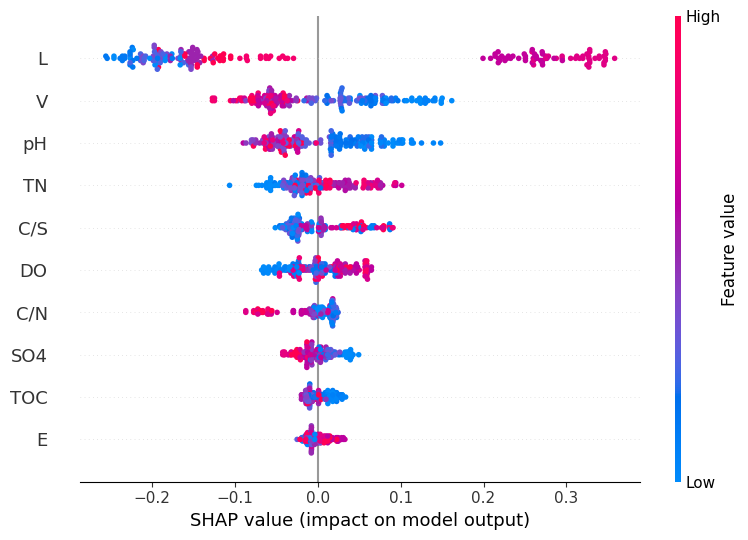

In [41]:
# 可视化SHAP值
shap.summary_plot(shap_values, df)

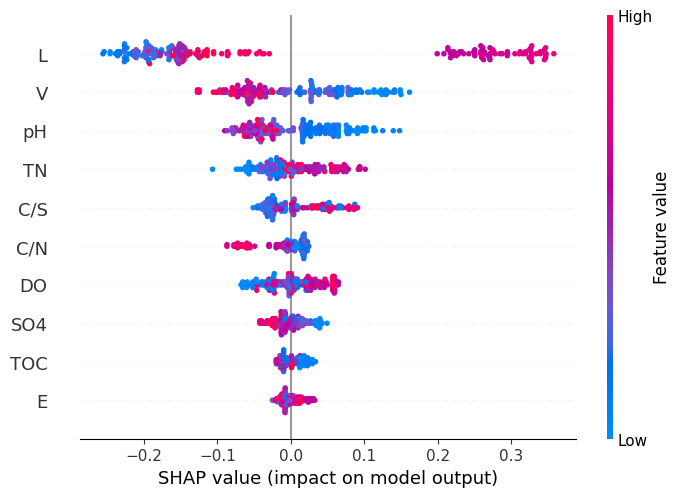

In [42]:
shap.plots.beeswarm(shap_values2, 
                    order=shap_values2.abs.max(0))

In [43]:
print(shap_values.shape)

(196, 10)


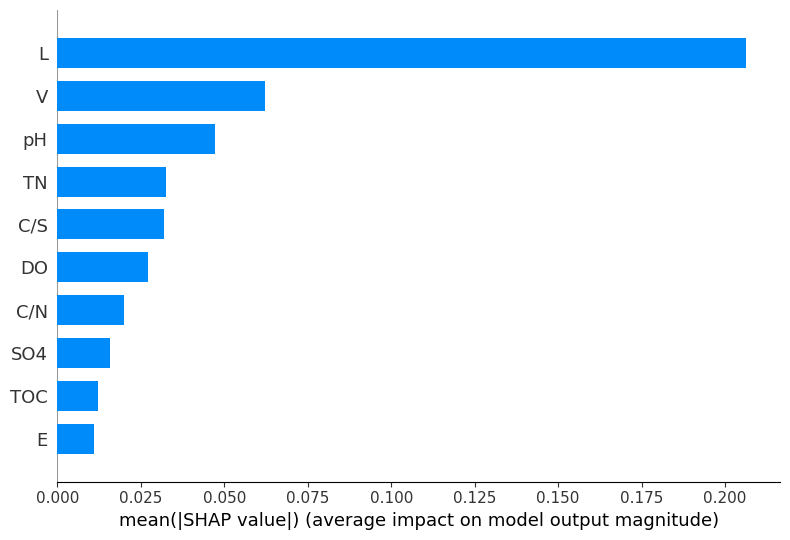

In [44]:
# 取每个特征的SHAP值的绝对值的平均值作为该特征的重要性
shap.summary_plot(shap_values, df, plot_type="bar")

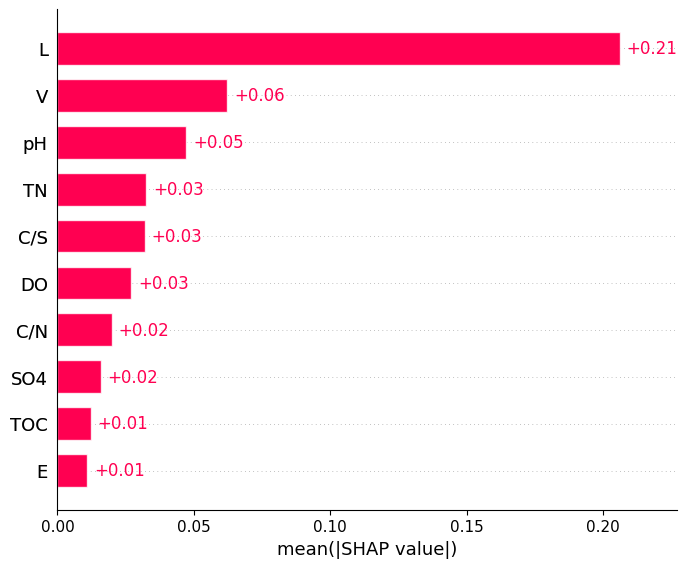

In [45]:
shap.plots.bar(shap_values2,max_display=11)

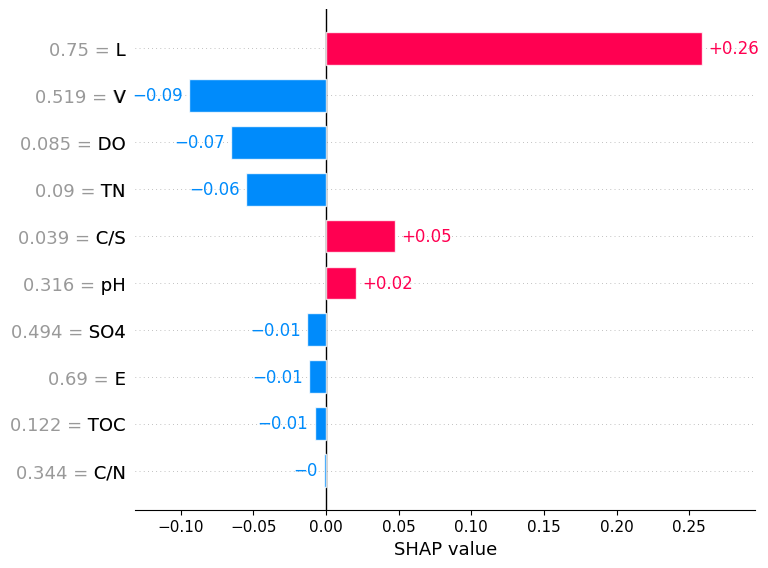

In [46]:
shap.plots.bar(shap_values2[1], show_data=True)

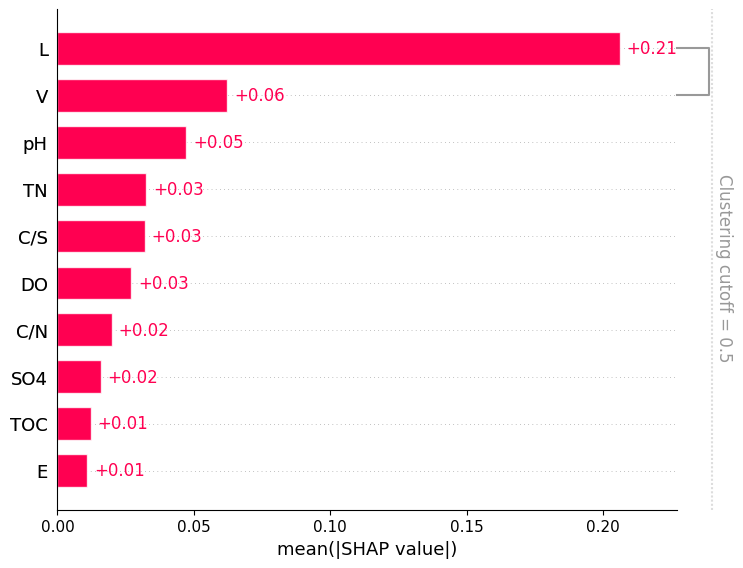

In [47]:
clustering = shap.utils.hclust(train_x, train_y) 
shap.plots.bar(shap_values2, 
               clustering=clustering,
               clustering_cutoff=0.5)

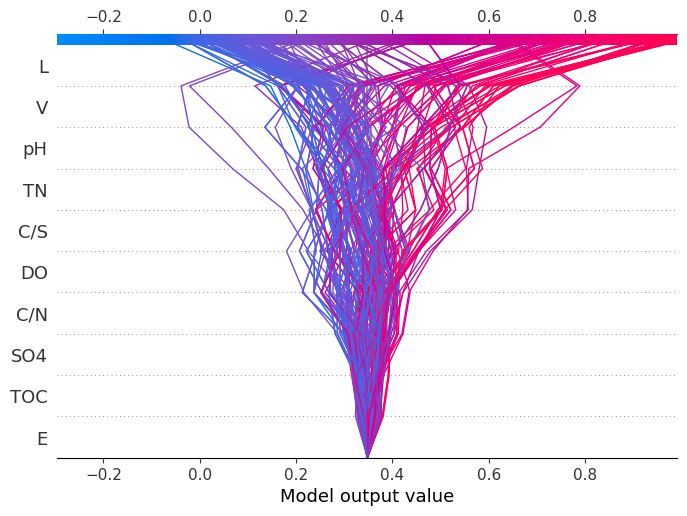

In [48]:
shap.decision_plot(explainer.expected_value, shap_values, df)

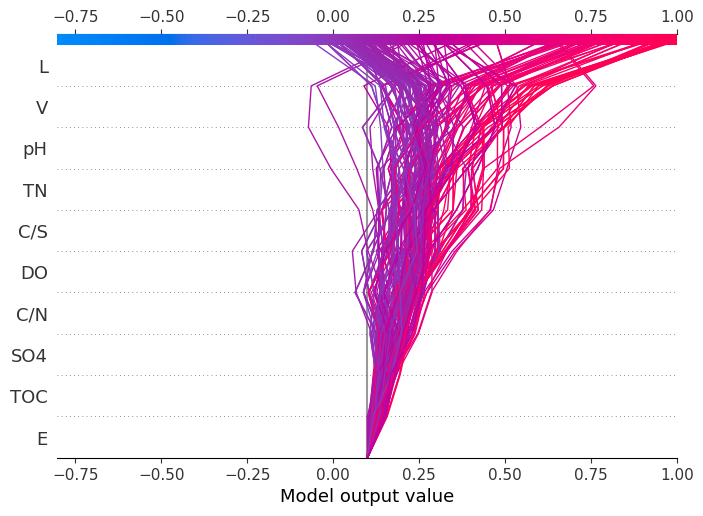

In [49]:
shap.decision_plot(explainer.expected_value, shap_values, df,new_base_value=0.1)

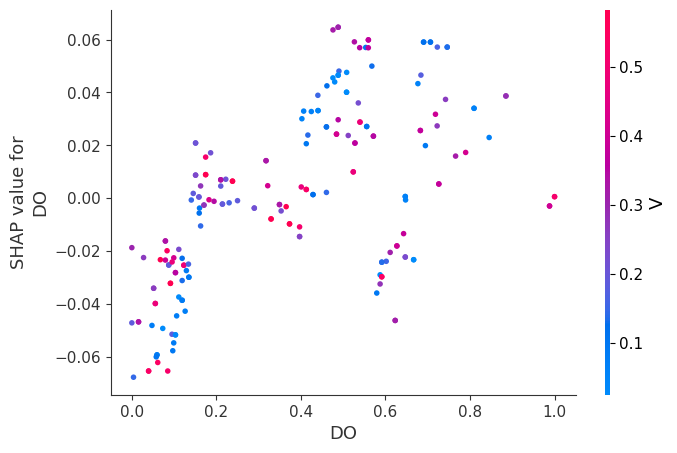

In [50]:
# 特征依赖
shap.dependence_plot("DO", shap_values2.values, df, interaction_index='V')

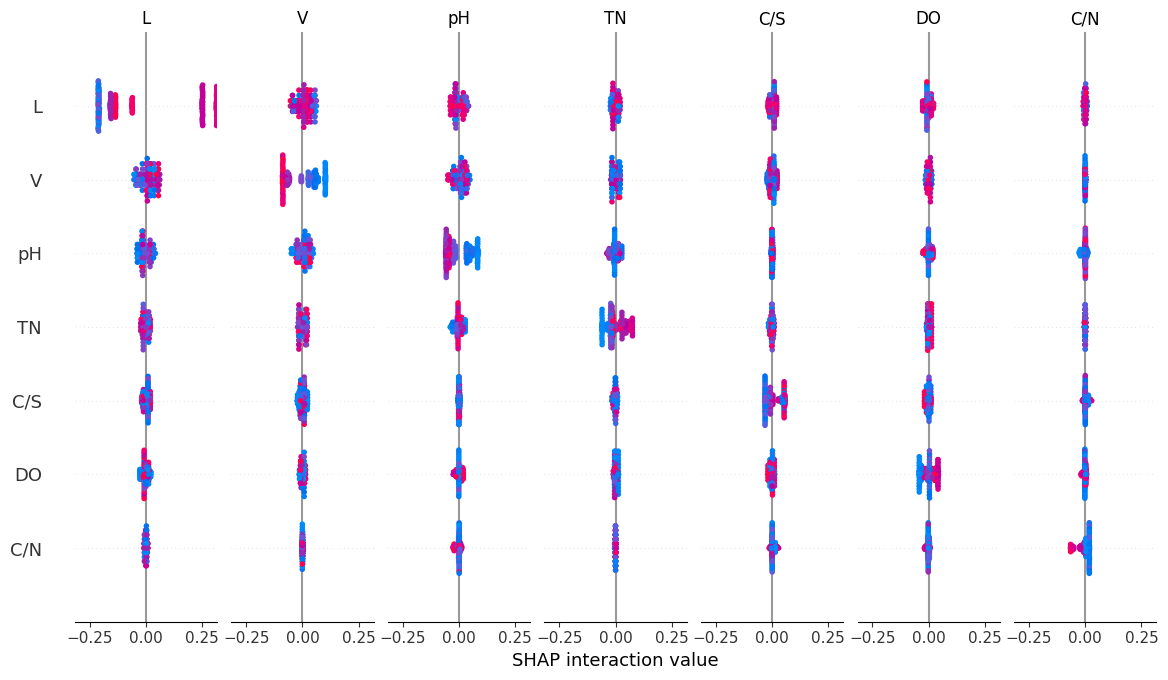

In [51]:
# 特征交互解释
shap_interaction_values = explainer.shap_interaction_values(df)
shap.summary_plot(shap_interaction_values, df)

In [52]:
# 如果不想用JS,传入matplotlib=True
shap.force_plot(explainer.expected_value, 
                shap_values[0,:], 
                df.iloc[0,:])

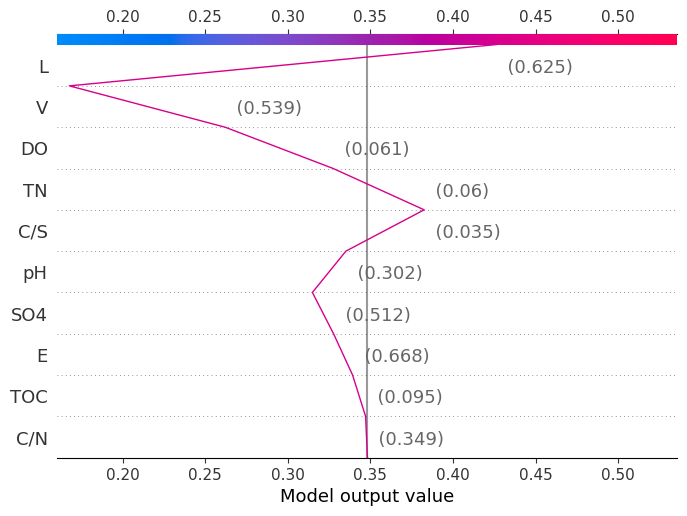

In [53]:
explainer = shap.TreeExplainer(model)
expected_value = explainer.expected_value
# 限制20个样本
features = df.iloc[range(102)]
# 展示第一条样本
shap_values = explainer.shap_values(features)[1]

shap.decision_plot(expected_value, shap_values,features)

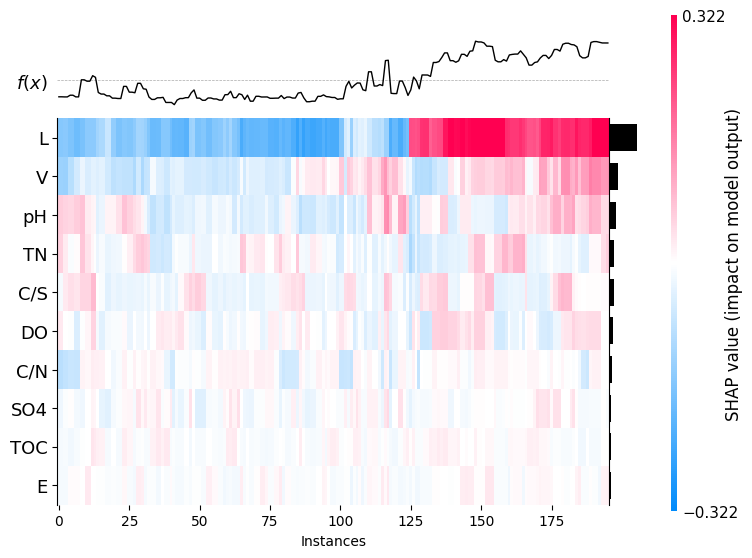

In [54]:
shap.plots.heatmap(shap_values2)